# EDA
### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import plotly.express as px
import pickle as pkl

dataset = "male_players (legacy)_23"
# dataset = "female_players_23"
df = pd.read_csv('Data/Preprocessed/Clean_'+dataset+'.csv')

print(len(df))

158866


In [2]:
# print non object columns sorted alphabetically
print(sorted(df.select_dtypes(exclude=['object']).columns))

['age', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'body_type_Lean', 'body_type_Normal', 'body_type_Stocky', 'body_type_Unique', 'cam', 'cb', 'cdm', 'cf', 'club_contract_valid_until_year', 'club_jersey_number', 'club_team_id', 'cm', 'defending', 'defending_marking_awareness', 'defending_sliding_tackle', 'defending_standing_tackle', 'dribbling', 'fifa_version', 'gk', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'height_cm', 'international_reputation', 'lam', 'lb', 'lcb', 'lcm', 'ldm', 'league_id', 'league_level', 'lf', 'lm', 'ls', 'lw', 'lwb', 'mentality_aggression', 'mentality_composure', 'mentality_interceptions', 'mentality_penalties', 'mentality_positioning', 'mentality_vision', 'movement_acceleration', 'movement_agility', 'movement_balance', 'movement_reactions', 'movement_sprint_speed', 'nationality_id', 'overall', 'pace', 'pass

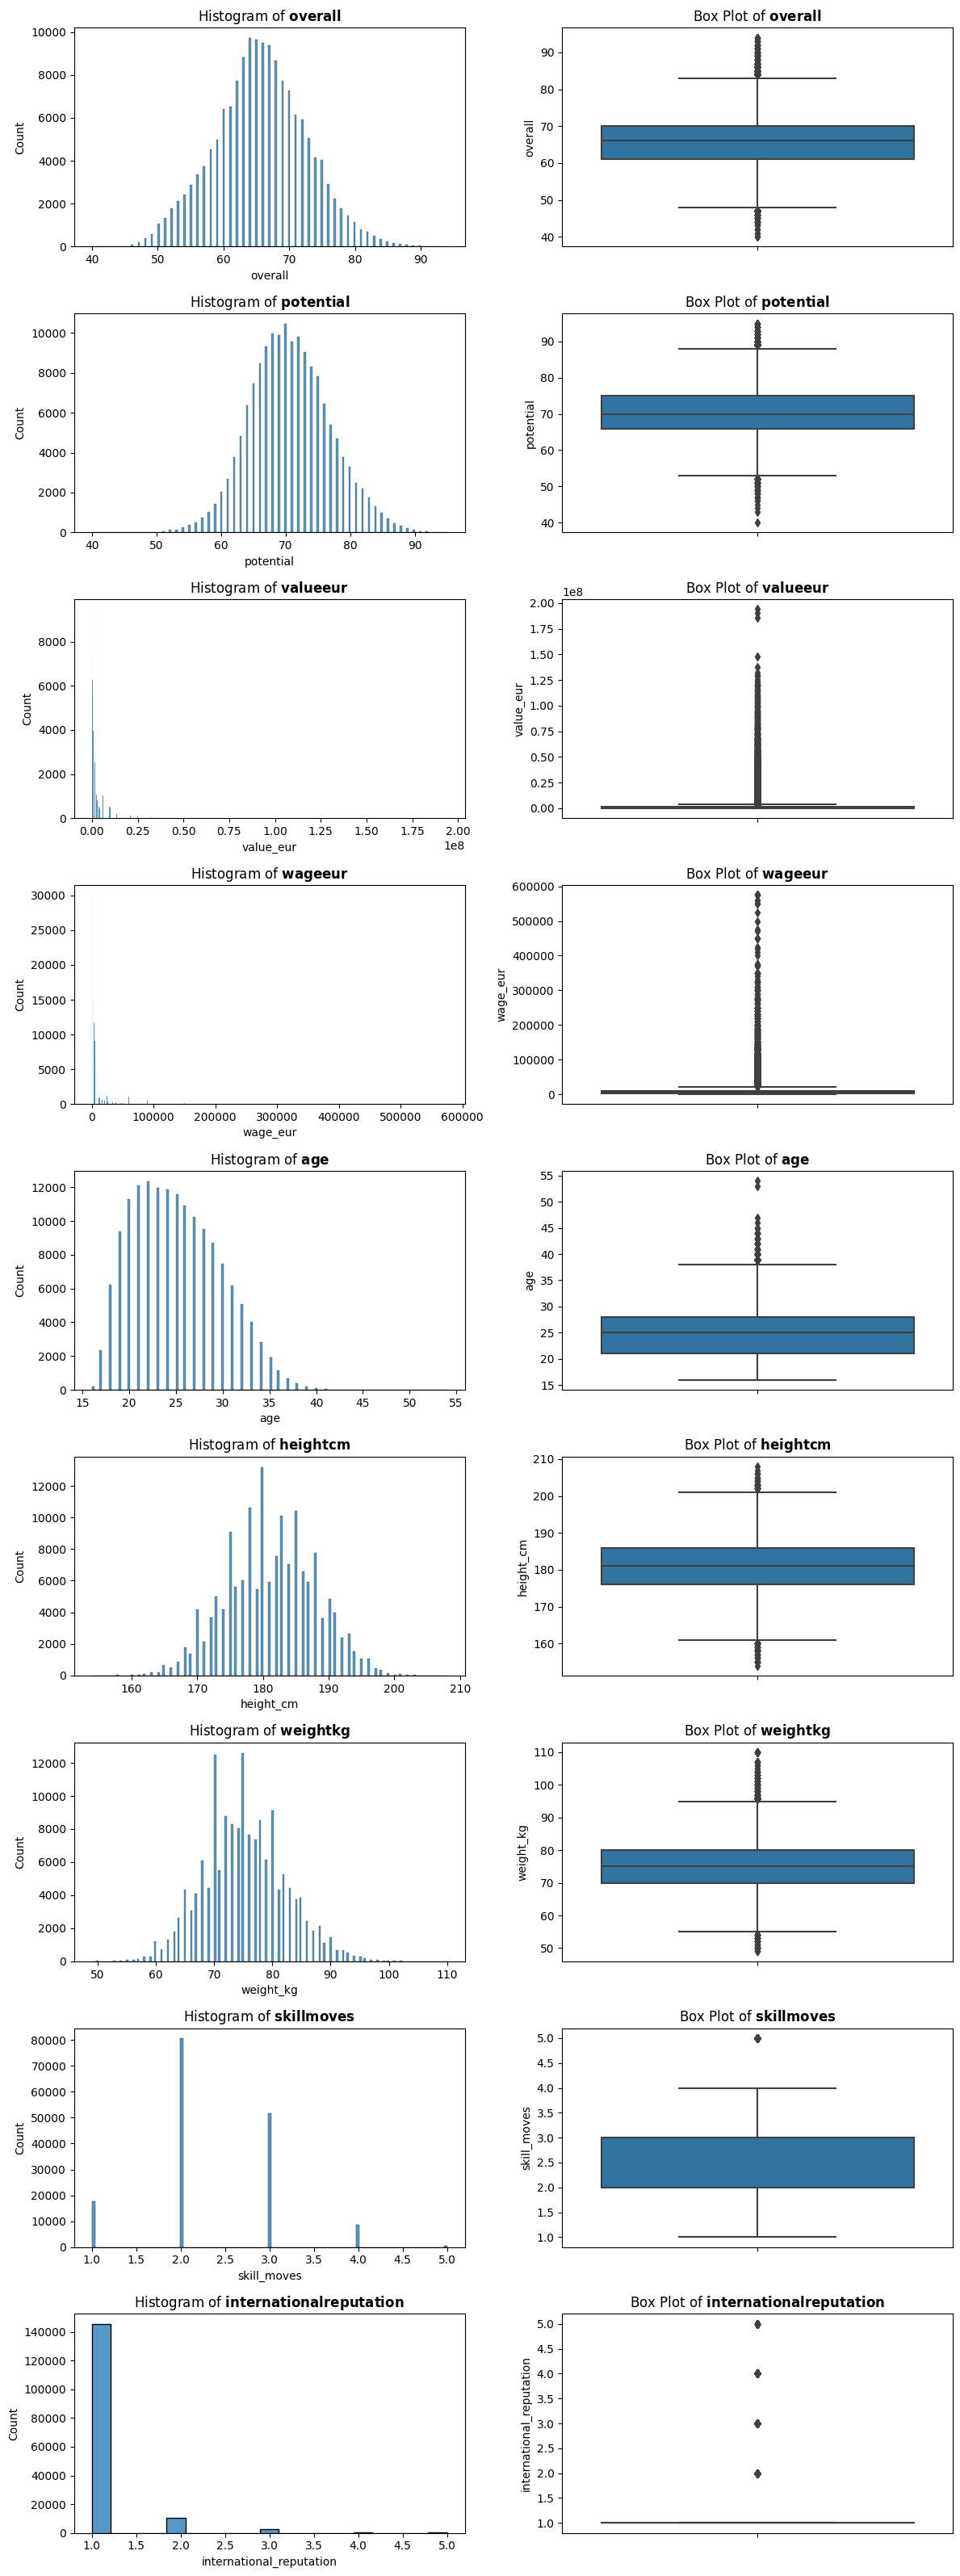

In [3]:
# sns.set_palette('deep')     # Reset the color palette to default
try:
    numerical_col = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'international_reputation']

    fig, axes = plt.subplots(nrows=len(numerical_col), ncols=2, figsize=(12, 32))
    fig.subplots_adjust(hspace=0.5)

    # distribution of player demographics features
    for i, col in enumerate(numerical_col):
        sns.histplot(data=df, x=col, ax=axes[i, 0])
        sns.boxplot(data=df, y=col, ax=axes[i, 1])
        # replace _ in column name with space
        col = col.replace('_', ' ')
        axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
        axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')
except:
    # clear figure
    plt.clf()
    numerical_col = ['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'international_reputation']

    fig, axes = plt.subplots(nrows=len(numerical_col), ncols=2, figsize=(12, 32))
    fig.subplots_adjust(hspace=0.5)

    # distribution of player demographics features
    for i, col in enumerate(numerical_col):
        sns.histplot(data=df, x=col, ax=axes[i, 0])
        sns.boxplot(data=df, y=col, ax=axes[i, 1])
        # replace _ in column name with space
        col = col.replace('_', ' ')
        axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
        axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')
plt.tight_layout()
plt.show()

before removing outliers: 158581, after removing: 139247, difference: 19334
before removing outliers: 158866, after removing: 139462, difference: 19404


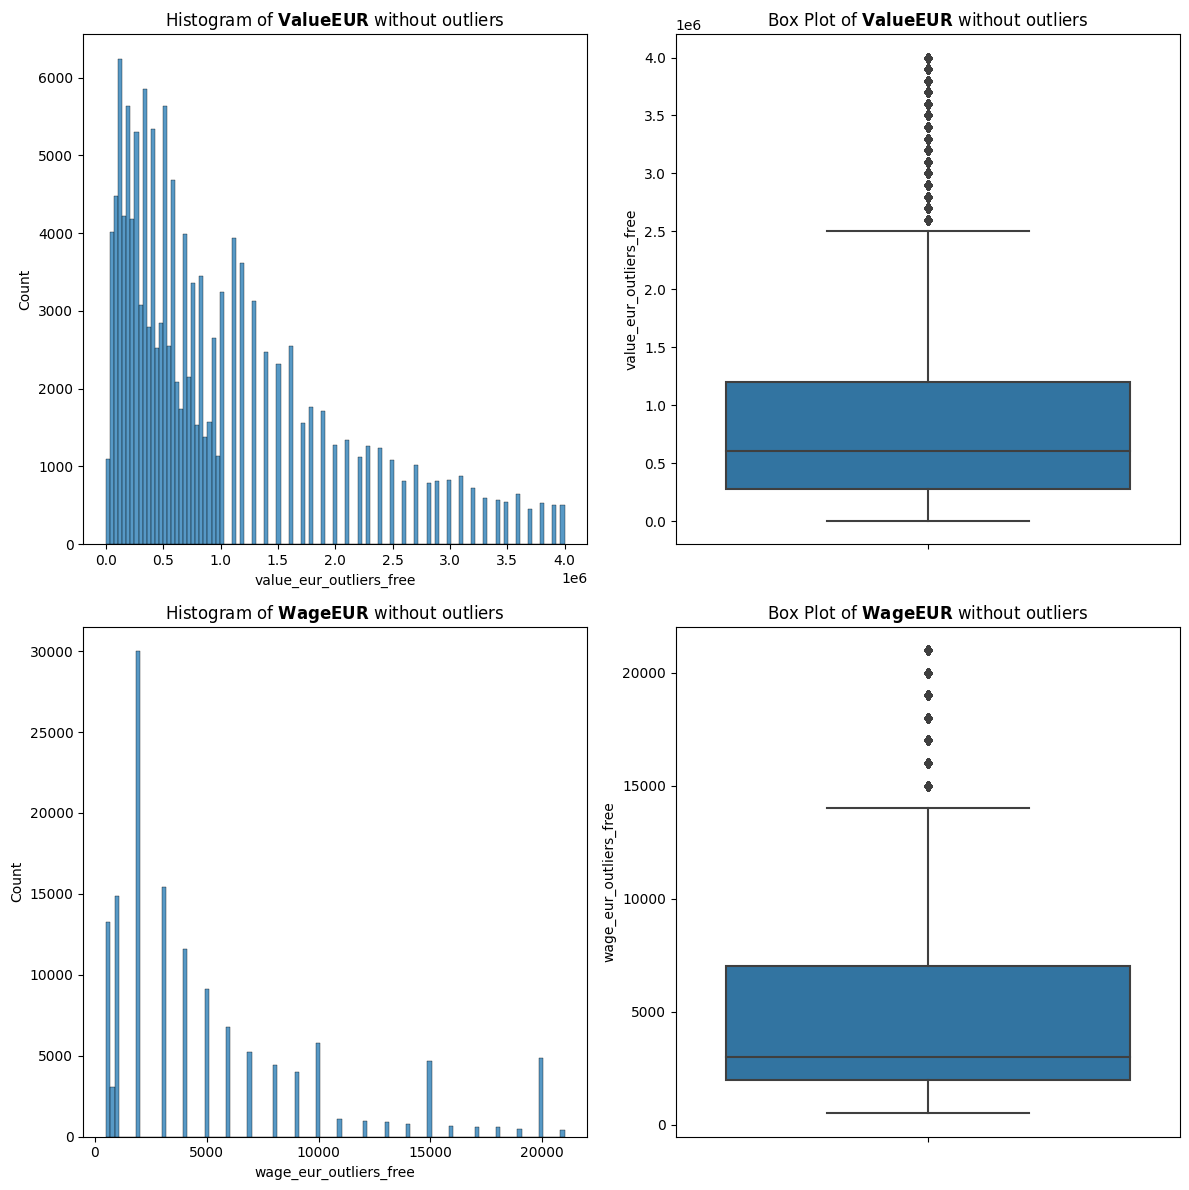

In [4]:
if dataset != "female_players_23":
    df2 = df.copy()
    # remove outliers from value_eur and wage_eur using IQR
    Q1 = df2['value_eur'].quantile(0.25)
    Q3 = df2['value_eur'].quantile(0.75)
    IQR = Q3 - Q1
    df2['value_eur_outliers_free'] = df2[(df2['value_eur'] > (Q1 - 1.5 * IQR)) & (df2['value_eur'] < (Q3 + 1.5 * IQR))]['value_eur']
    Q1 = df2['wage_eur'].quantile(0.25)
    Q3 = df2['wage_eur'].quantile(0.75)
    IQR = Q3 - Q1
    df2['wage_eur_outliers_free'] = df2[(df2['wage_eur'] > (Q1 - 1.5 * IQR)) & (df2['wage_eur'] < (Q3 + 1.5 * IQR))]['wage_eur']

    # print length before and after
    print(f"before removing outliers: {df['value_eur'].notnull().sum()}, after removing: {df2['value_eur_outliers_free'].notnull().sum()}, difference: {df['value_eur'].notnull().sum() - df2['value_eur_outliers_free'].notnull().sum()}")
    print(f"before removing outliers: {df['wage_eur'].notnull().sum()}, after removing: {df2['wage_eur_outliers_free'].notnull().sum()}, difference: {df['wage_eur'].notnull().sum() - df2['wage_eur_outliers_free'].notnull().sum()}")

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5)

    sns.histplot(data=df2, x='value_eur_outliers_free', ax=axes[0, 0])
    sns.boxplot(data=df2, y='value_eur_outliers_free', ax=axes[0, 1])
    axes[0, 0].set_title(r'Histogram of $\bf{Value EUR}$ without outliers')
    axes[0, 1].set_title(r'Box Plot of $\bf{Value EUR}$ without outliers')

    sns.histplot(data=df2, x='wage_eur_outliers_free', ax=axes[1, 0])
    sns.boxplot(data=df2, y='wage_eur_outliers_free', ax=axes[1, 1])
    axes[1, 0].set_title(r'Histogram of $\bf{Wage EUR}$ without outliers')
    axes[1, 1].set_title(r'Box Plot of $\bf{Wage EUR}$ without outliers')

    plt.tight_layout()
    plt.show()




    

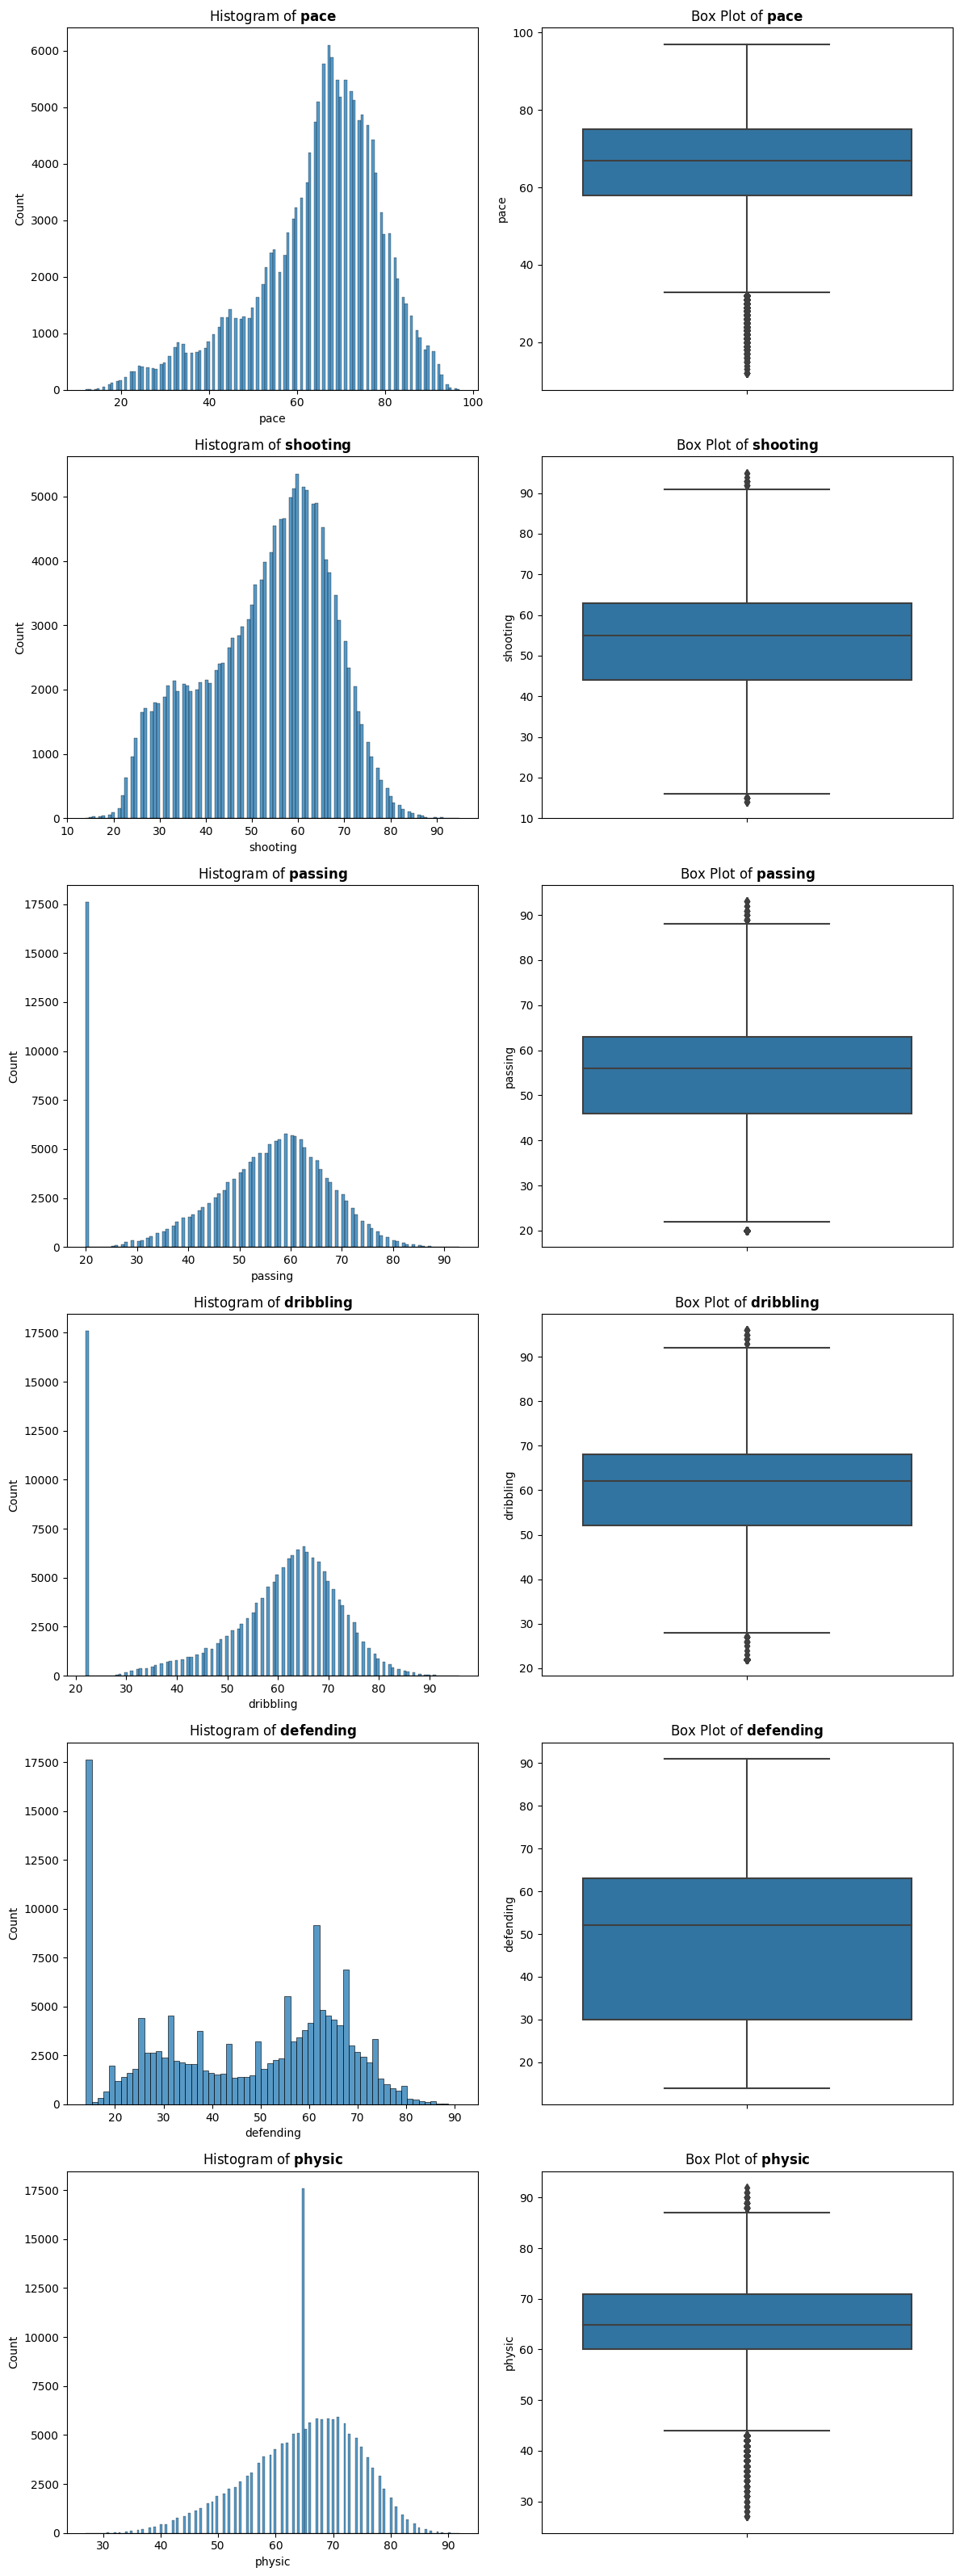

In [5]:
stats = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

fig, axes = plt.subplots(nrows=len(stats), ncols=2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

# distribution of player demographics features
for i, col in enumerate(stats):
    sns.histplot(data=df, x=col, ax=axes[i, 0])
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    # replace _ in column name with space
    col = col.replace('_', ' ')
    axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
    axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')

plt.tight_layout()
plt.show()

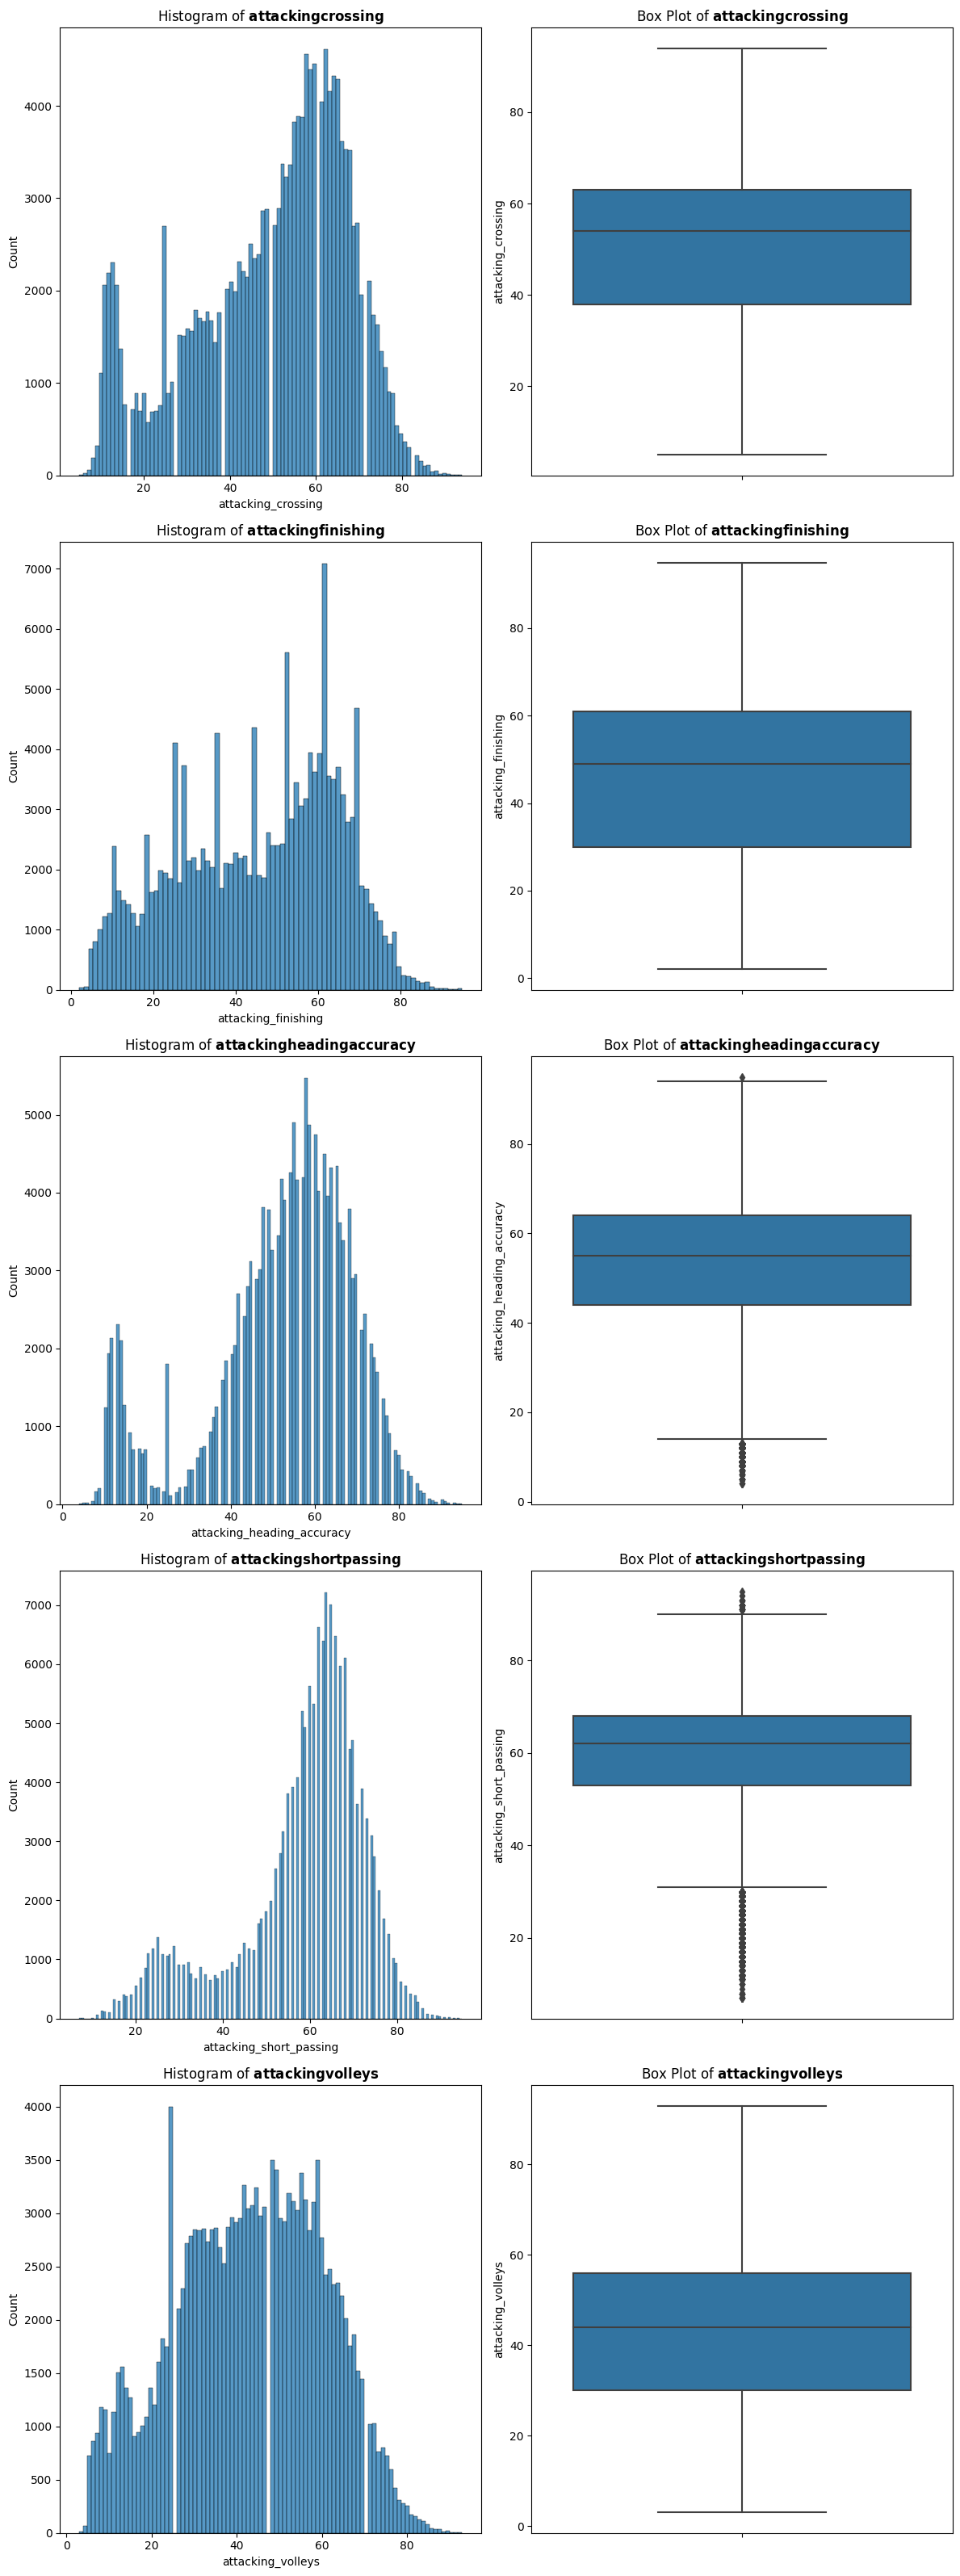

In [6]:
attacking = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']

fig, axes = plt.subplots(nrows=len(attacking), ncols=2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

# distribution of player demographics features
for i, col in enumerate(attacking):
    sns.histplot(data=df, x=col, ax=axes[i, 0])
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    # replace _ in column name with space
    col = col.replace('_', ' ')
    axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
    axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')

plt.tight_layout()
plt.show()

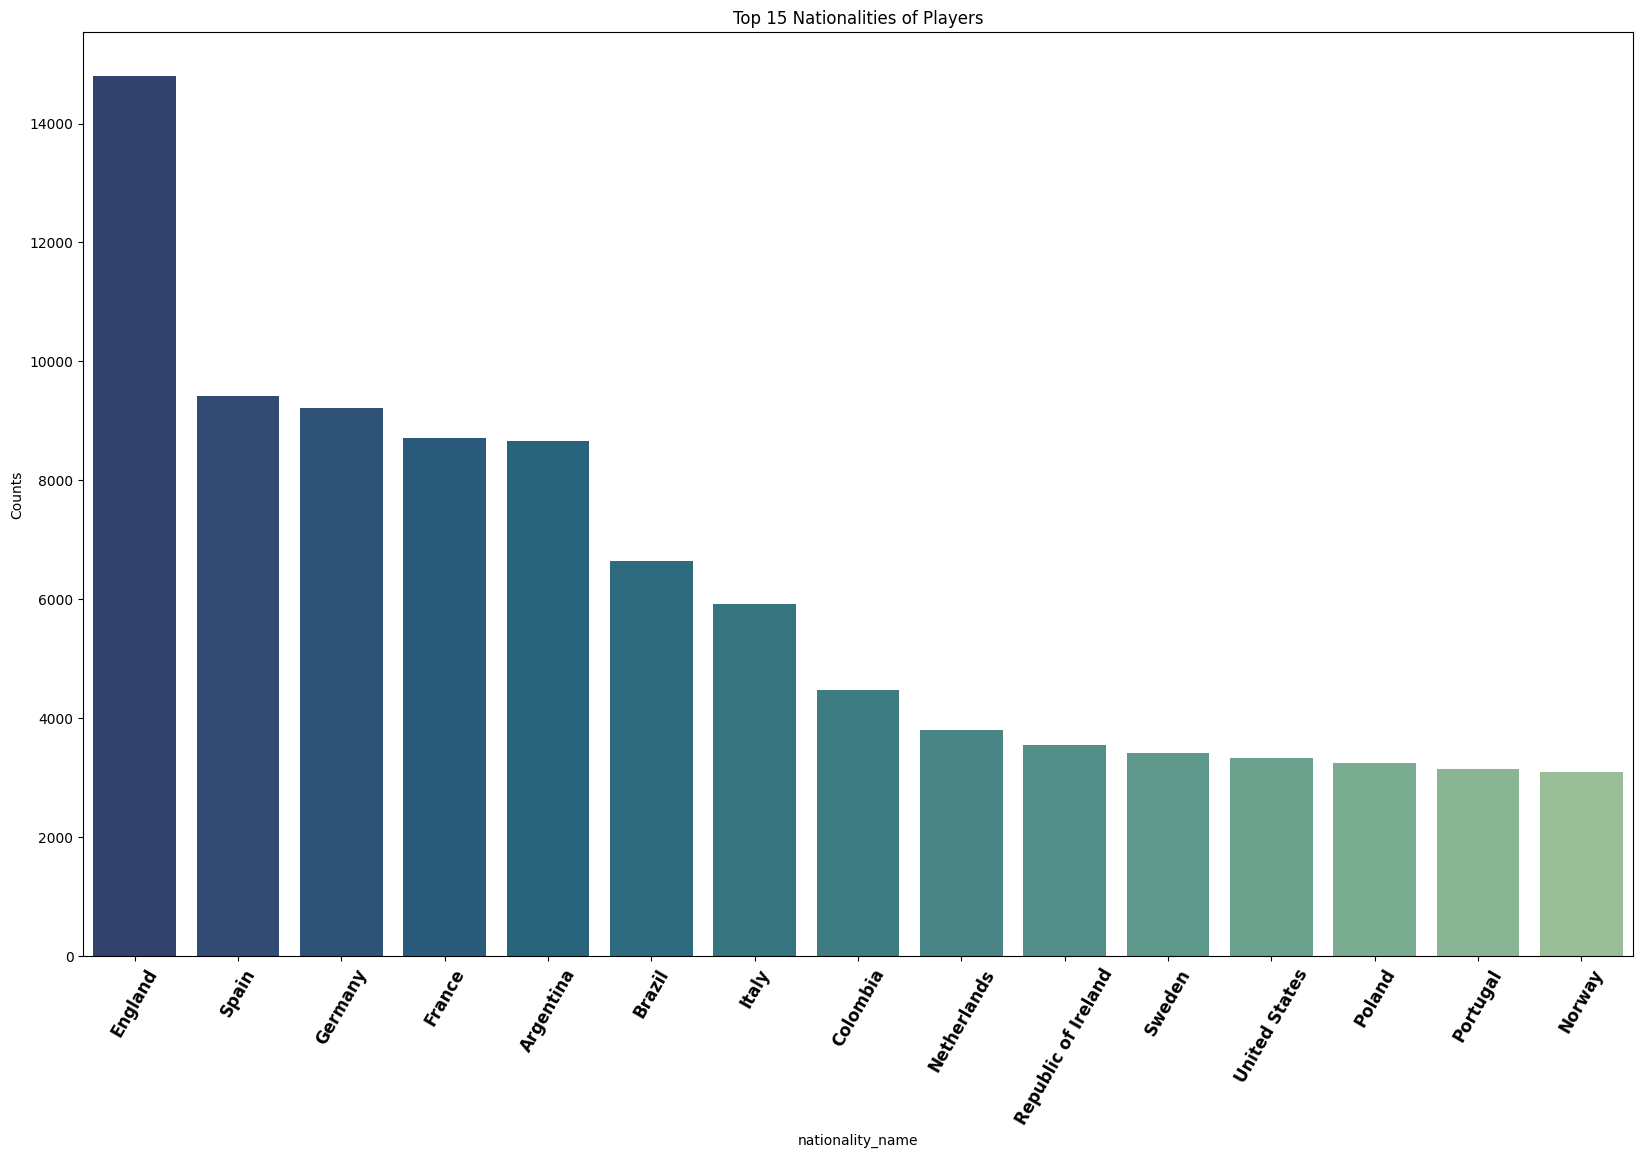

In [7]:
nationality_count = 15
if dataset == "female_players_23":
    nationality_count = 9

nat_cnt=df.groupby('nationality_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_nat_cnt=nat_cnt[:nationality_count]
plt.figure(figsize=(20, 12))
sns.barplot(x='nationality_name', y='Counts', data=top_nat_cnt, palette='crest_r')
plt.title(f'Top {nationality_count} Nationalities of Players')
plt.xticks(rotation=60, weight = 'bold', fontsize = 12) 
plt.show()

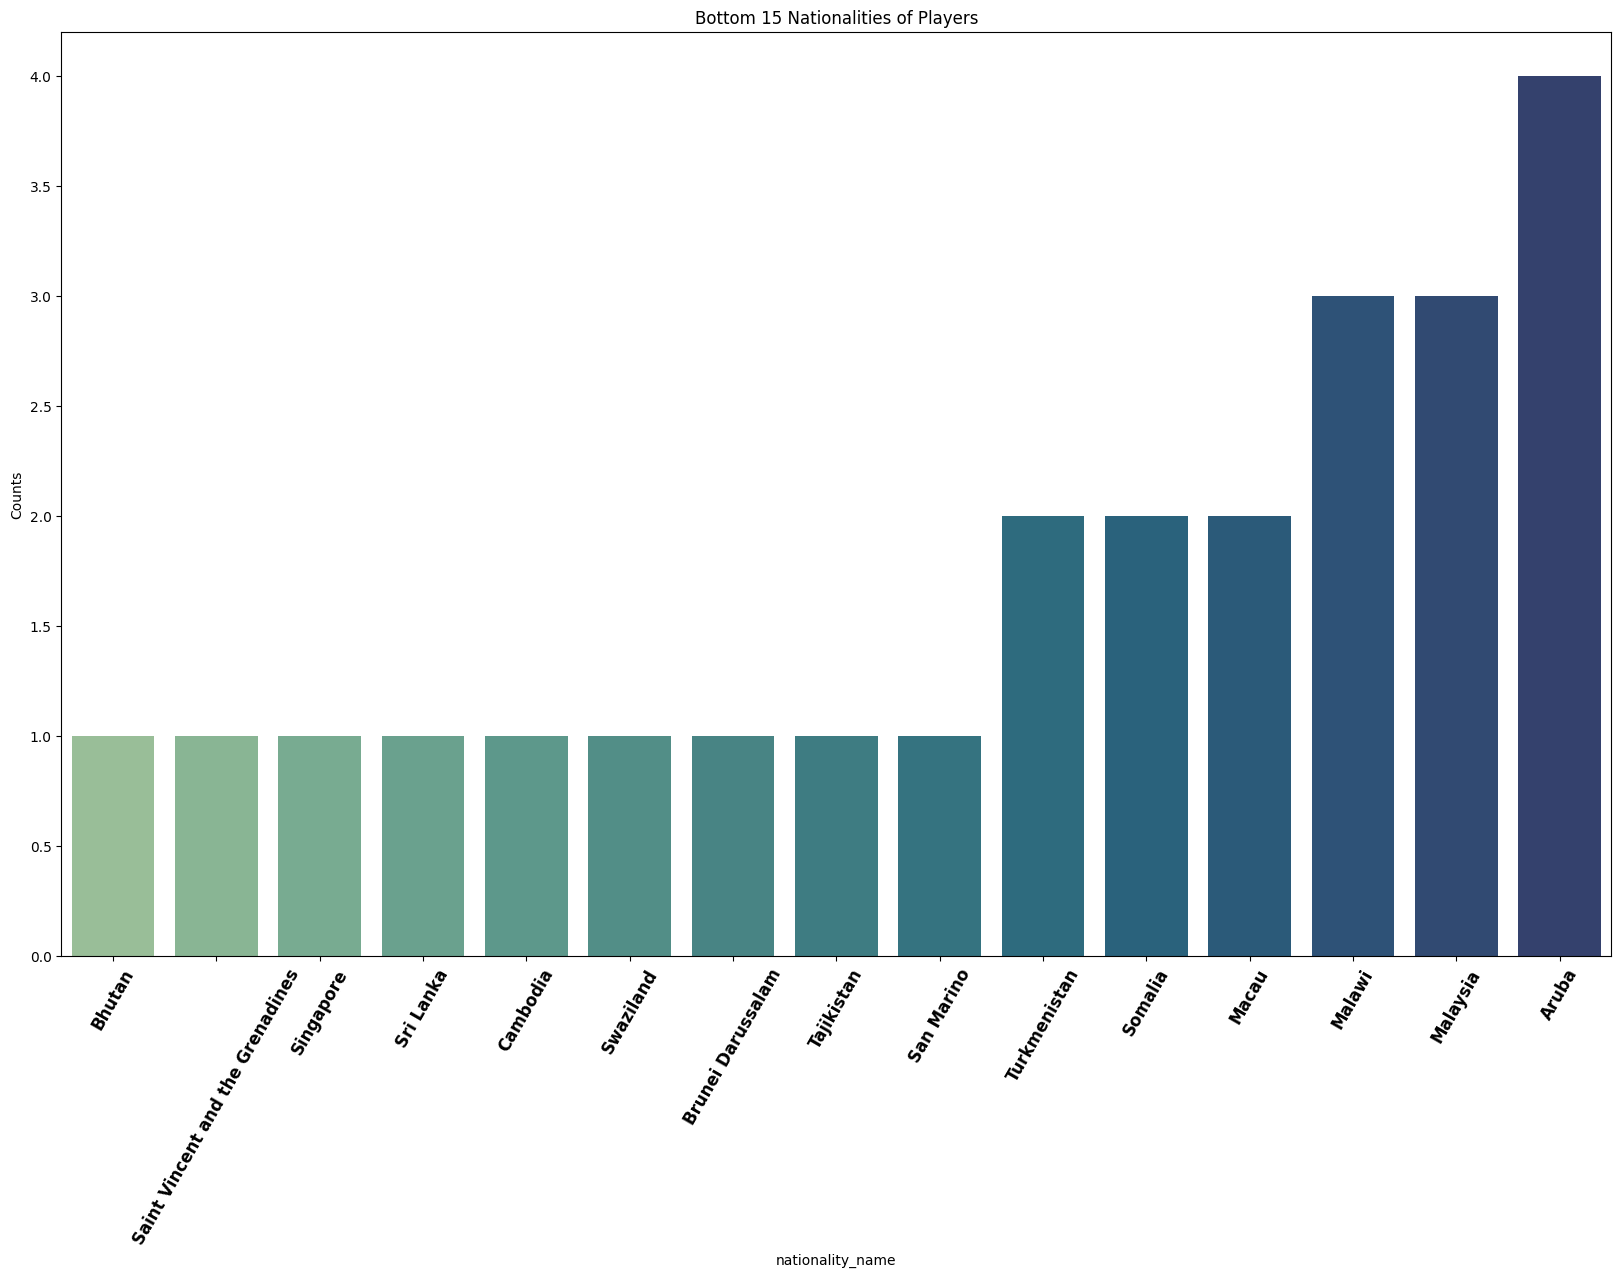

In [8]:
nat_cnt=df.groupby('nationality_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=True,inplace=True)
bottom_nat_cnt=nat_cnt[:nationality_count]
plt.figure(figsize=(20, 12))
sns.barplot(x='nationality_name', y='Counts', data=bottom_nat_cnt, palette='crest')
plt.title(f'Bottom {nationality_count} Nationalities of Players')
plt.xticks(rotation=60, weight = 'bold', fontsize = 12) 
plt.show()

# Some nations have too few players, this could be increased by taking the full national team

In [9]:
# number of players in Egypt
(df['nationality_name'] == 'Egypt').sum()

133

In [10]:
try:
    # count unique values in club_name
    len(df['club_name'].unique())
except:
    print("No club_name column in females")

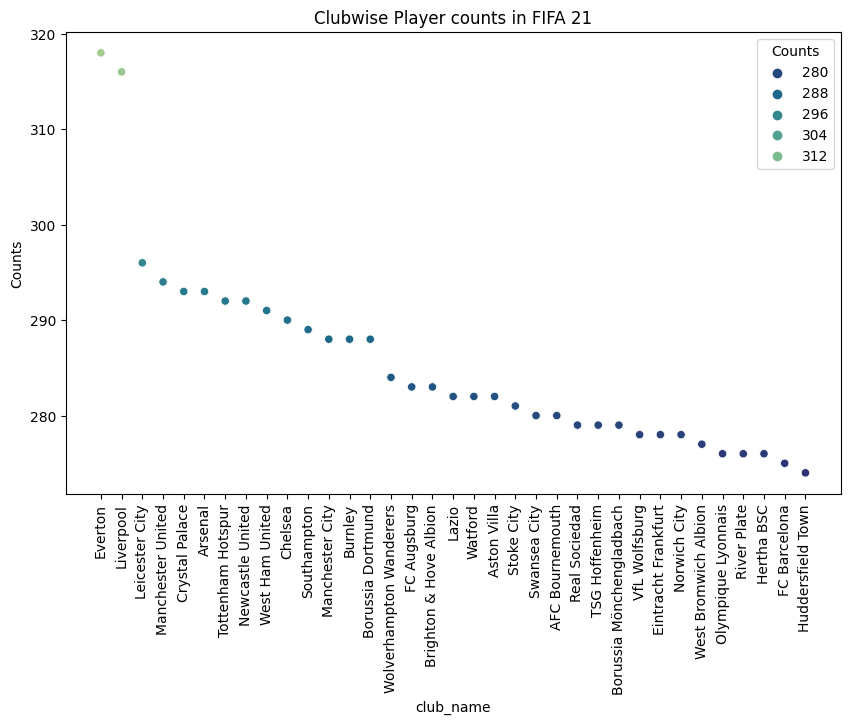

In [11]:
try:
    club_count=df.groupby('club_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
    club_count.sort_values(by='Counts',ascending=False,inplace=True)
    top_35_clubs=club_count[:35]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='club_name', y='Counts', data=top_35_clubs, hue='Counts', palette='crest_r')
    plt.title('Clubwise Player counts in FIFA 21')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()
    # fig.show()
except:
    print("No club_name column in females")

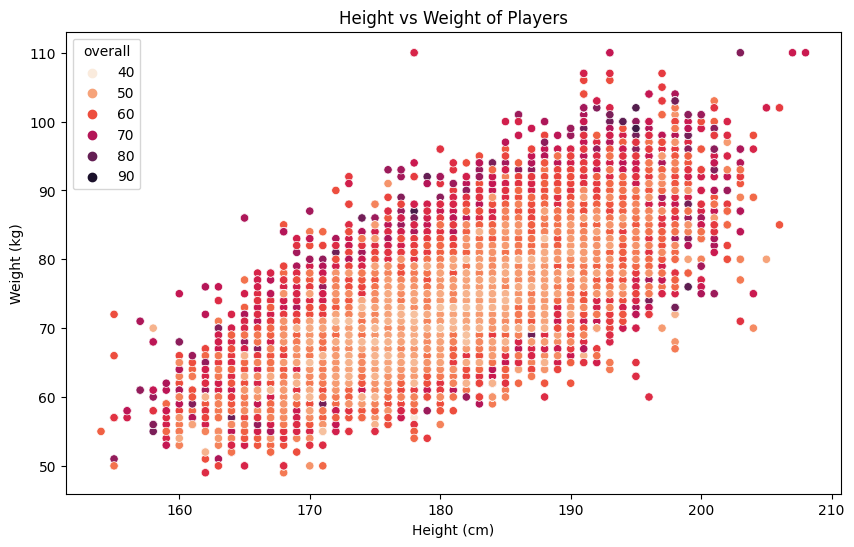

In [12]:
# make a scatter plot of height vs weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df, palette='rocket_r', hue= 'overall')
plt.title('Height vs Weight of Players')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# We notice that the overall rating is higher for people on the edges of the plot

C:\Users\DELL\AppData\Local\Temp\ipykernel_20576\4120740915.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='overall', y='weight_by_height', data=df, palette='rocket_r')


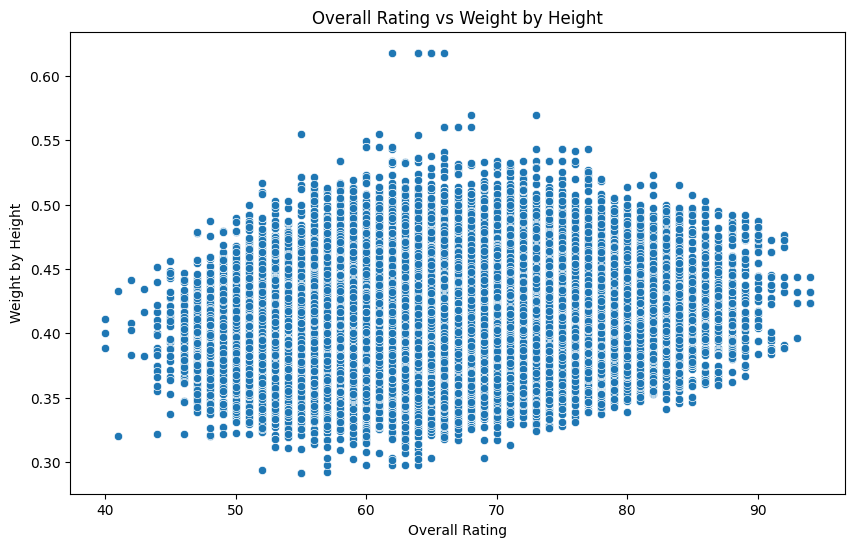

In [13]:
# No useful information can be extracted from the plot
# plot overall vs weight divided by height
df['weight_by_height'] = df['weight_kg'] / df['height_cm']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall', y='weight_by_height', data=df, palette='rocket_r')
plt.title('Overall Rating vs Weight by Height')
plt.xlabel('Overall Rating')
plt.ylabel('Weight by Height')
plt.show()

# drop the column
df = df.drop(columns = ['weight_by_height'])

# people with overall > 90, are usually between 0.35 and 0.5

In [14]:
df['weak_foot'].value_counts()

weak_foot
3    98740
2    33905
4    22854
5     2025
1     1342
Name: count, dtype: int64

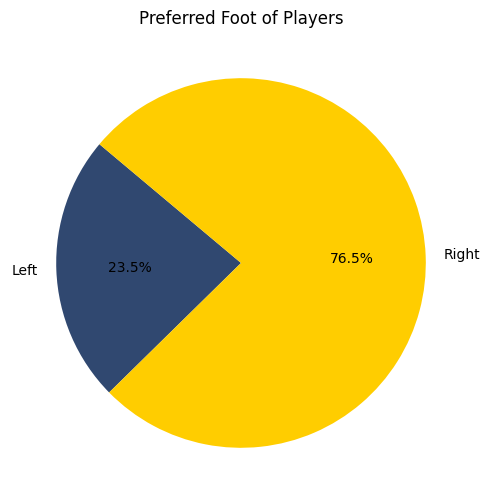

In [15]:
plt.figure(figsize=(10, 6))

# Create a dictionary to map the values
foot_dict = {0: 'Left', 1: 'Right'}
df['preferred_foot_text'] = df['preferred_foot'].map(foot_dict)

labels = ['Left', 'Right']  # Specify the order of the labels here
df['preferred_foot_text'].value_counts()[labels].plot.pie(autopct='%1.1f%%', colors=['#304870','#ffcd00'], startangle=140, labels=labels)

plt.title('Preferred Foot of Players')
plt.ylabel('')
plt.show()

# drop the column
df = df.drop(columns = ['preferred_foot_text'])

In [16]:
# strikers: ls, st, rs, lf, cf, rf
# midfielders:  lam, cam, ram, lm, lcm, cm, rcm, rm, ldm, cdm, rdm
# wingers: lw, rw
# back: lwb, rwb, lb, lcb, cb, rcb, rb
# goalkeepers: gk
strikers = ['ls', 'st', 'rs', 'lf', 'cf', 'rf']
midfielders = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
wingers = ['lw', 'rw']
defenders = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
goalkeepers = ['gk']

In [17]:
if dataset != 'female_players_23':
    df['club_position'].value_counts()
    strikers = ['ls', 'st', 'rs', 'lf', 'cf', 'rf']
    midfielders = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
    wingers = ['lw', 'rw']
    defenders = ['lcb', 'cb', 'rcb']
    backwingers = ['lwb', 'rwb', 'lb', 'rb']
    goalkeepers = ['gk']

    # make a new column for the position of the player
    df['position'] = 'Reserved'
    df.loc[df['club_position'].str.lower().isin(strikers), 'position'] = 'Striker'
    df.loc[df['club_position'].str.lower().isin(midfielders), 'position'] = 'Midfielder'
    df.loc[df['club_position'].str.lower().isin(wingers), 'position'] = 'Winger'
    df.loc[df['club_position'].str.lower().isin(backwingers), 'position'] = 'BackWinger'
    df.loc[df['club_position'].str.lower().isin(defenders), 'position'] = 'Defender'
    df.loc[df['club_position'].str.lower().isin(goalkeepers), 'position'] = 'Goalkeeper'
else:
    print("No club positions for females")

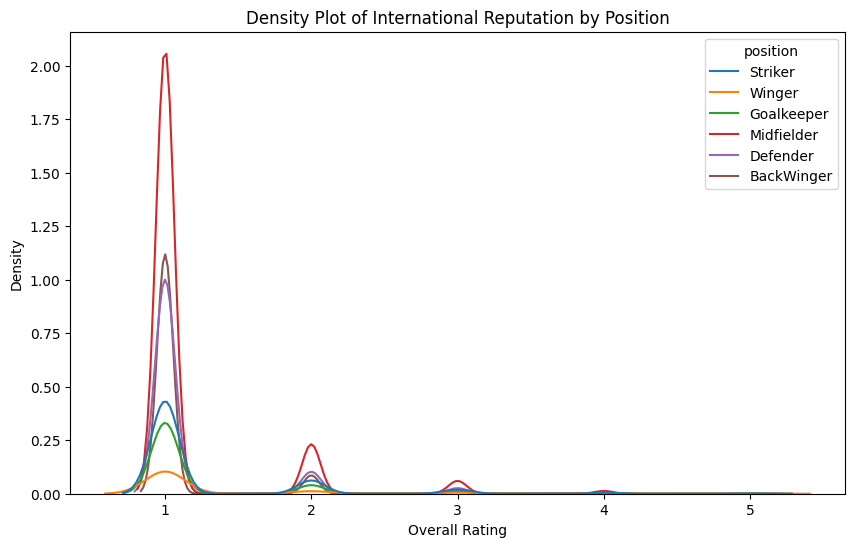

In [18]:
if dataset != 'female_players_23':
    # plot density function for club position against overall
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[df['position'] != 'Reserved'], x='international_reputation', hue='position')
    plt.title('Density Plot of International Reputation by Position')
    plt.xlabel('Overall Rating')
    plt.ylabel('Density')
    plt.show()


In [19]:
df['international_reputation'].value_counts()

international_reputation
1    145331
2     10611
3      2423
4       439
5        62
Name: count, dtype: int64

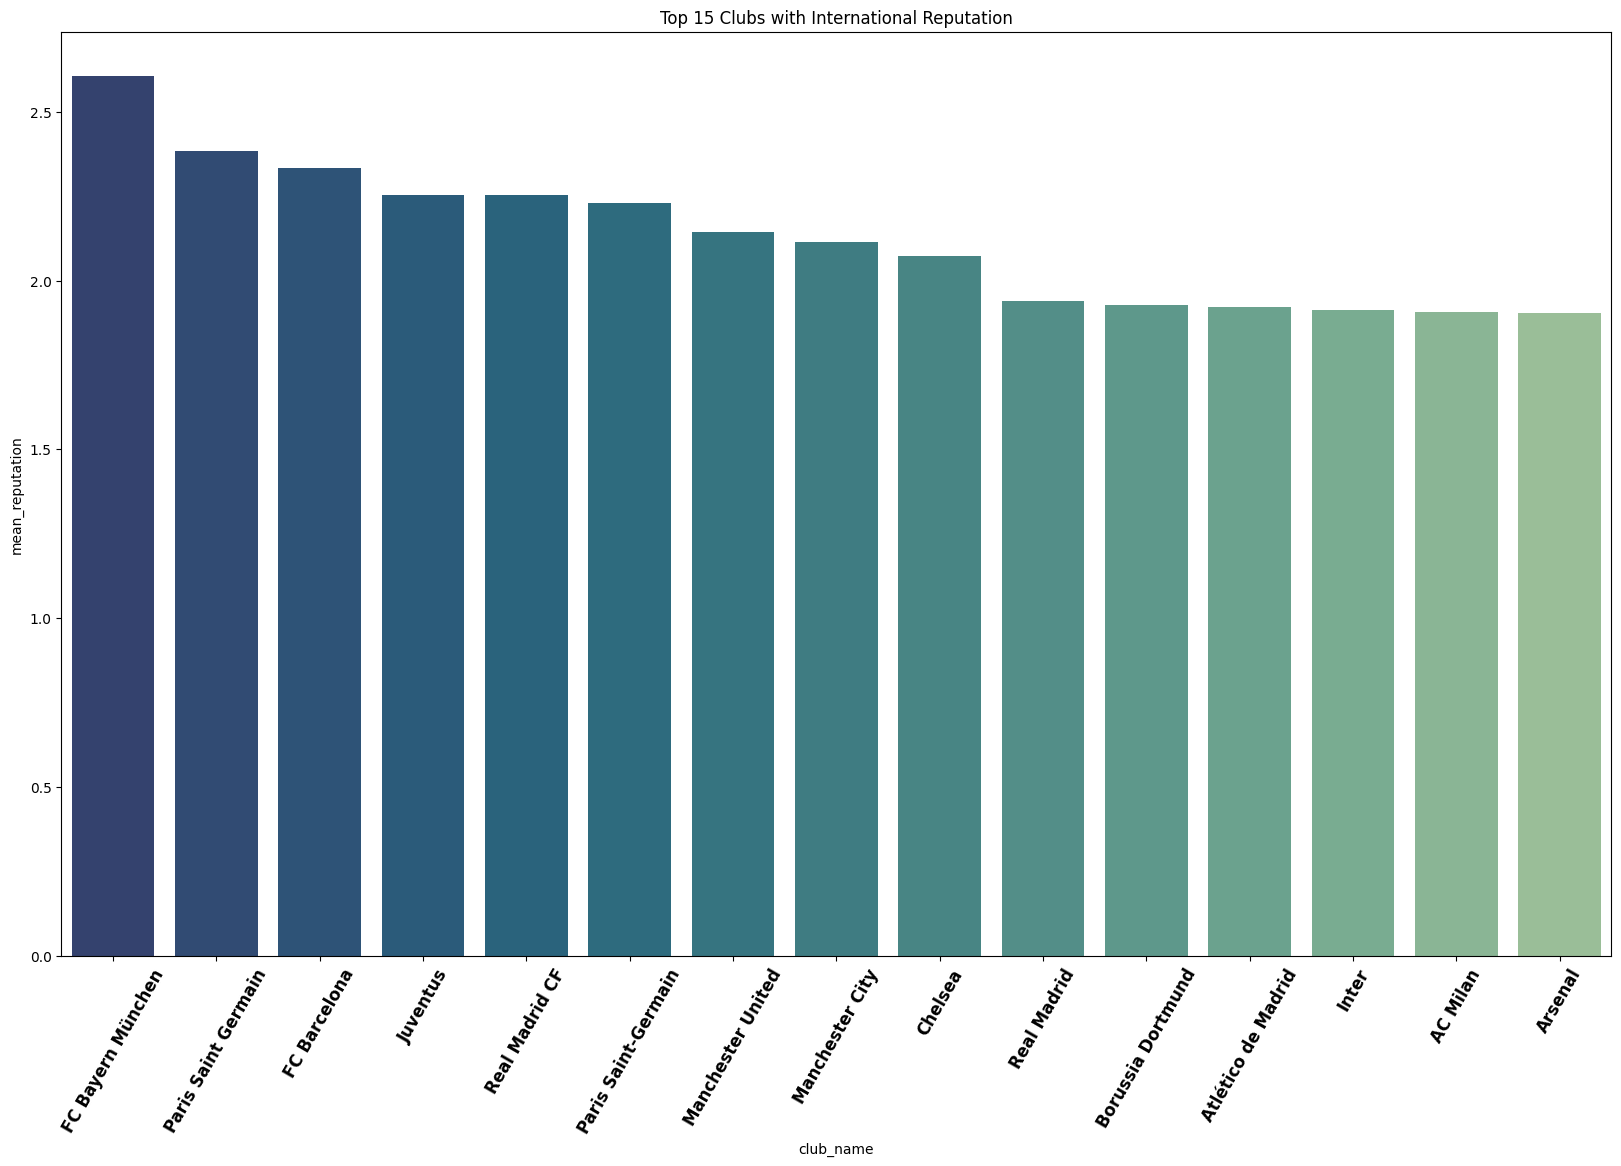

In [20]:
if dataset != 'female_players_23':
    famous_teams = df.groupby('club_name')['international_reputation'].mean().reset_index(name='mean_reputation')
    famous_teams.sort_values(by='mean_reputation',ascending=False,inplace=True)
    top_15=famous_teams[:15]
    plt.figure(figsize=(20, 12))
    sns.barplot(x='club_name', y='mean_reputation', data=top_15, palette='crest_r')
    plt.title('Top 15 Clubs with International Reputation')
    plt.xticks(rotation=60, weight = 'bold', fontsize = 12) 
    plt.show()
else:
    print("No club names for females")

# TODO: n3ml mokarna ma bein teamein, aw nafs el team 3la sanatein

In [21]:
# group by el team, b3dein el la3eeba where position asasy
# striker: finishing, strength, short_passing, agility, dribbling, balance, acceleration, sprint_speed
# midfielder: short_passing, long_passing, ball_control, dribbling, balance, agility, stamina
# winger: crossing, dribbling, ball_control, acceleration, sprint_speed, agility
# defender: defending, heading, standing_tackle, sliding_tackle, interceptions, marking, strength
# goalkeeper: gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes

# team_name = 'Real Madrid'
team_name = 'FC Barcelona'
df_team = df[df['club_name'] == team_name]
df_team = df_team[df_team['position'] != 'Reserved']
print(df_team['position'].value_counts(),"\n\n")

team_name2 = 'Real Madrid'
df_team2 = df[df['club_name'] == team_name2]
df_team2 = df_team2[df_team2['position'] != 'Reserved']
print(df_team2['position'].value_counts())

position
Midfielder    27
Winger        18
Defender      18
BackWinger    18
Striker        9
Goalkeeper     9
Name: count, dtype: int64 


position
Midfielder    3
Defender      2
Winger        2
BackWinger    2
Striker       1
Goalkeeper    1
Name: count, dtype: int64


*FC Barcelona* is lacking in acceleration. It needs to improve from 83.67 to 85.0 at least
*FC Barcelona* is lacking in pace. It needs to improve from 79.78 to 85.0 at least


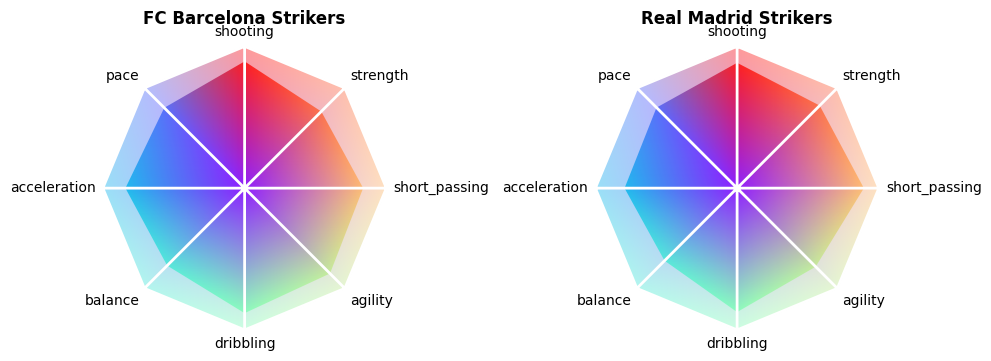

In [22]:
# Striker
# attacking = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']
# striker: finishing, strength, short_passing, agility, dribbling, balance, acceleration, sprint_speed
strikers = df_team[df_team['position'] == 'Striker']


proportions = np.array([strikers['shooting'].mean(), strikers['power_strength'].mean(), strikers['attacking_short_passing'].mean(),
               strikers['movement_agility'].mean(), strikers['dribbling'].mean(), strikers['movement_balance'].mean(),
                strikers['movement_acceleration'].mean(), strikers['pace'].mean()]) / 100
labels = ["shooting", "strength", "short_passing", "agility", "dribbling", "balance", "acceleration", "pace"]     # dyh el skills nafsaha

thresholds = np.array([85, 75, 70, 80, 80, 70, 85, 85]) / 100
# This team lacks in attacking due to with {labels} higher than {threshold}
# This team is lacking in {labels}. The team needs to improve from {proportions} to {thresholds} at least
for i in range(len(labels)):
    if proportions[i] < thresholds[i]:
        print(f"*{team_name}* is lacking in {labels[i]}. It needs to improve from {round(proportions[i]*100, 2)} to {round(thresholds[i]*100, 2)} at least")
        # round the decimals to 2nd decimal

strikers2 = df_team2[df_team2['position'] == 'Striker']

proportions2 = np.array([strikers2['shooting'].mean(), strikers2['power_strength'].mean(), strikers2['attacking_short_passing'].mean(),
                strikers2['movement_agility'].mean(), strikers2['dribbling'].mean(), strikers2['movement_balance'].mean(),
                strikers2['movement_acceleration'].mean(), strikers2['pace'].mean()]) / 100




N = len(proportions)
proportions = np.append(proportions, 1)
proportions2 = np.append(proportions2, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
triang_foregr2 = tri.Triangulation(x * proportions2, y * proportions2, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.figure(figsize=(10, 5))  # Create a new figure

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name + ' Strikers', weight = 'bold')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr2, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name2 + ' Strikers', weight = 'bold')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

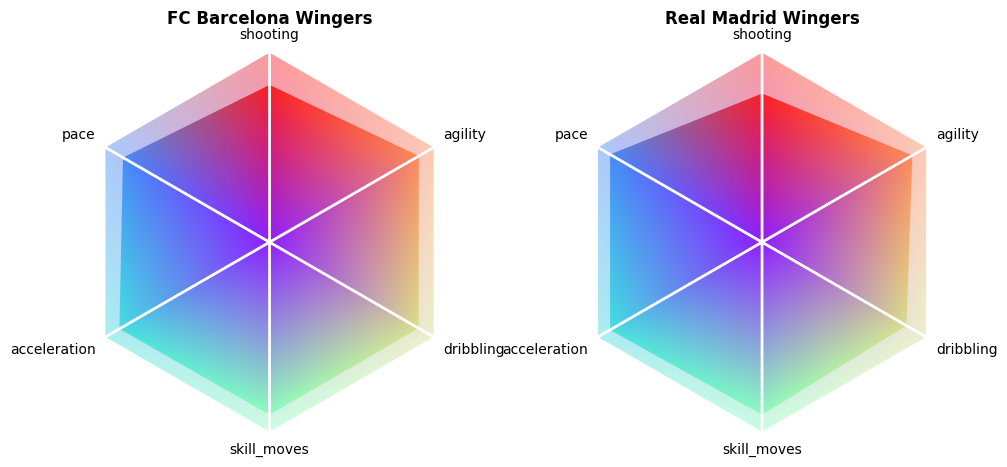

In [23]:
# Winger
wingers = df_team[df_team['position'] == 'Winger']



proportions = np.array([wingers['shooting'].mean(), wingers['movement_agility'].mean(),
                        wingers['dribbling'].mean(), wingers['skill_moves'].mean(),
                wingers['movement_acceleration'].mean(), wingers['pace'].mean()]) / 100
proportions[3] = proportions[3]*20      # scaling it from 0-5 to 0-100

labels = ["shooting", "agility", "dribbling", "skill_moves", "acceleration", "pace"]     # dyh el skills nafsaha

thresholds = np.array([80, 75, 85, 80, 85, 85]) / 100
# This team lacks in attacking due to with {labels} higher than {threshold}
# This team is lacking in {labels}. The team needs to improve from {proportions} to {thresholds} at least
for i in range(len(labels)):
    if proportions[i] < thresholds[i]:
        print(f"*{team_name}* is lacking in {labels[i]}. It needs to improve from {round(proportions[i]*100, 2)} to {round(thresholds[i]*100, 2)} at least")
        # round the decimals to 2nd decimal

wingers2 = df_team2[df_team2['position'] == 'Winger']

proportions2 = np.array([wingers2['shooting'].mean(), wingers2['movement_agility'].mean(),
                        wingers2['dribbling'].mean(), wingers2['skill_moves'].mean(),
                wingers2['movement_acceleration'].mean(), wingers2['pace'].mean()]) / 100
proportions2[3] = proportions2[3]*20      # scaling it from 0-5 to 0-100


N = len(proportions)
proportions = np.append(proportions, 1)
proportions2 = np.append(proportions2, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
triang_foregr2 = tri.Triangulation(x * proportions2, y * proportions2, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.figure(figsize=(10, 5))  # Create a new figure

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name + ' Wingers', weight = 'bold')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr2, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name2 + ' Wingers', weight = 'bold')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

*FC Barcelona* is lacking in pace. It needs to improve from 64.22 to 80.0 at least
*FC Barcelona* is lacking in passing. It needs to improve from 83.52 to 85.0 at least
*FC Barcelona* is lacking in shooting. It needs to improve from 70.56 to 75.0 at least
*FC Barcelona* is lacking in skill_moves. It needs to improve from 68.15 to 80.0 at least
*FC Barcelona* is lacking in physic. It needs to improve from 71.78 to 80.0 at least
*FC Barcelona* is lacking in defending. It needs to improve from 70.78 to 82.0 at least


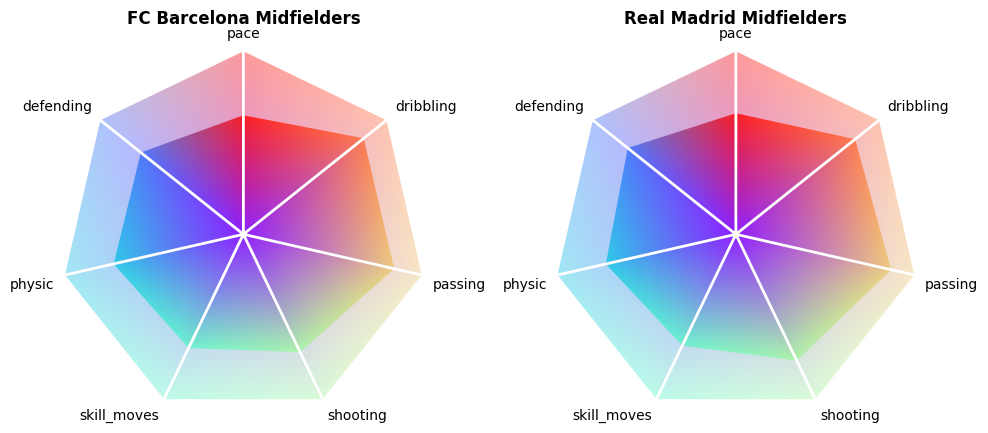

In [24]:
midfielders = df_team[df_team['position'] == 'Midfielder']


proportions = np.array([midfielders['pace'].mean(), midfielders['dribbling'].mean(), midfielders['passing'].mean(),
                        midfielders['shooting'].mean(), midfielders['skill_moves'].mean(),
                        midfielders['physic'].mean(), midfielders['defending'].mean()]) / 100

proportions[4] = proportions[4]*20      # scaling it from 0-5 to 0-100

labels = ["pace", "dribbling", "passing", "shooting", "skill_moves", "physic", "defending"]     # dyh el skills nafsaha

thresholds = np.array([80, 80, 85, 75, 80, 80, 82]) / 100

# This team lacks in attacking due to with {labels} higher than {threshold}
# This team is lacking in {labels}. The team needs to improve from {proportions} to {thresholds} at least
for i in range(len(labels)):
    if proportions[i] < thresholds[i]:
        print(f"*{team_name}* is lacking in {labels[i]}. It needs to improve from {round(proportions[i]*100, 2)} to {round(thresholds[i]*100, 2)} at least")
        # round the decimals to 2nd decimal

midfielders2 = df_team2[df_team2['position'] == 'Midfielder']

proportions2 = np.array([midfielders2['pace'].mean(), midfielders2['dribbling'].mean(), midfielders2['passing'].mean(),
                        midfielders2['shooting'].mean(), midfielders2['skill_moves'].mean(),
                        midfielders2['physic'].mean(), midfielders2['defending'].mean()]) / 100

proportions2[4] = proportions2[4]*20      # scaling it from 0-5 to 0-100

N = len(proportions)
proportions = np.append(proportions, 1)
proportions2 = np.append(proportions2, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
triang_foregr2 = tri.Triangulation(x * proportions2, y * proportions2, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.figure(figsize=(10, 5))  # Create a new figure

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name + ' Midfielders', weight = 'bold')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr2, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name2 + ' Midfielders', weight = 'bold')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

*FC Barcelona* is lacking in pace. It needs to improve from 87.11 to 88.0 at least
*FC Barcelona* is lacking in physic. It needs to improve from 72.44 to 73.0 at least


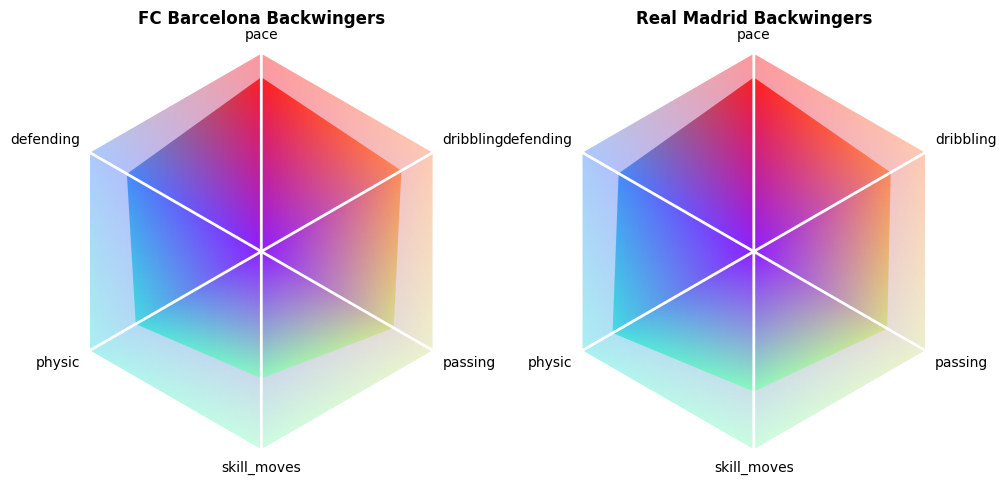

In [25]:
backwingers = df_team[df_team['position'] == 'BackWinger']


proportions = np.array([backwingers['pace'].mean(), backwingers['dribbling'].mean(), backwingers['passing'].mean(),
                         backwingers['skill_moves'].mean(),
                        backwingers['physic'].mean(), backwingers['defending'].mean()]) / 100

proportions[3] = proportions[3]*20      # scaling it from 0-5 to 0-100

labels = ["pace", "dribbling", "passing", "skill_moves", "physic", "defending"]     # dyh el skills nafsaha

thresholds = np.array([88, 73, 75, 60, 73, 77]) / 100

# This team lacks in attacking due to with {labels} higher than {threshold}
# This team is lacking in {labels}. The team needs to improve from {proportions} to {thresholds} at least
for i in range(len(labels)):
    if proportions[i] < thresholds[i]:
        print(f"*{team_name}* is lacking in {labels[i]}. It needs to improve from {round(proportions[i]*100, 2)} to {round(thresholds[i]*100, 2)} at least")
        # round the decimals to 2nd decimal

backwingers2 = df_team2[df_team2['position'] == 'BackWinger']

proportions2 = np.array([backwingers2['pace'].mean(), backwingers2['dribbling'].mean(), backwingers2['passing'].mean(),
                            backwingers2['skill_moves'].mean(),
                        backwingers2['physic'].mean(), backwingers2['defending'].mean()]) / 100

proportions2[3] = proportions2[3]*20      # scaling it from 0-5 to 0-100
N = len(proportions)
proportions = np.append(proportions, 1)
proportions2 = np.append(proportions2, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
triang_foregr2 = tri.Triangulation(x * proportions2, y * proportions2, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.figure(figsize=(10, 5))  # Create a new figure

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name + ' Backwingers', weight = 'bold')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr2, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name2 + ' Backwingers', weight = 'bold')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

In [26]:
df['height_cm'].describe()
# the max is 208

count    158866.000000
mean        181.244074
std           6.747477
min         154.000000
25%         176.000000
50%         181.000000
75%         186.000000
max         208.000000
Name: height_cm, dtype: float64

*FC Barcelona* is lacking in pace. It needs to improve from 66.17 to 77.0 at least
*FC Barcelona* is lacking in physic. It needs to improve from 78.17 to 83.0 at least


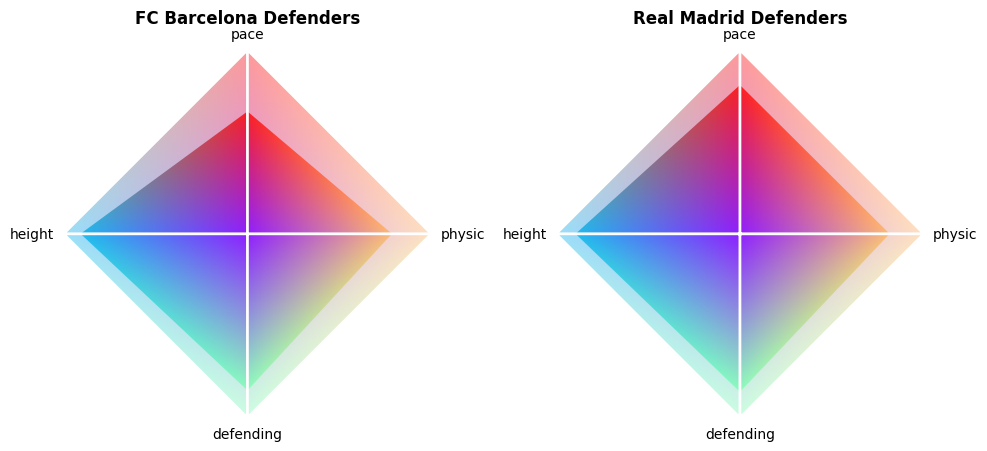

In [27]:
defenders = df_team[df_team['position'] == 'Defender']

max_height = df['height_cm'].max()

proportions = np.array([defenders['pace'].mean(),defenders['physic'].mean(),
                        defenders['defending'].mean(), defenders['height_cm'].mean()]) / 100

proportions[3] = proportions[3]*100/max_height      # scaling it from 0-5 to 0-100


labels = ["pace", "physic", "defending", "height"]     # dyh el skills nafsaha

thresholds = np.array([77, 83, 83, 180*100/max_height]) / 100

# This team lacks in attacking due to with {labels} higher than {threshold}
# This team is lacking in {labels}. The team needs to improve from {proportions} to {thresholds} at least
for i in range(len(labels)):
    if proportions[i] < thresholds[i]:
        print(f"*{team_name}* is lacking in {labels[i]}. It needs to improve from {round(proportions[i]*100, 2)} to {round(thresholds[i]*100, 2)} at least")
        # round the decimals to 2nd decimal

defenders2 = df_team2[df_team2['position'] == 'Defender']

proportions2 = np.array([defenders2['pace'].mean(),defenders2['physic'].mean(),
                        defenders2['defending'].mean(), defenders2['height_cm'].mean()]) / 100

proportions2[3] = proportions2[3]*100/max_height      # scaling it from 0-5 to 0-100

N = len(proportions)
proportions = np.append(proportions, 1)
proportions2 = np.append(proportions2, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
triang_foregr2 = tri.Triangulation(x * proportions2, y * proportions2, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.figure(figsize=(10, 5))  # Create a new figure

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name + ' Defenders', weight = 'bold')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr2, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name2 + ' Defenders', weight = 'bold')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

In [28]:
df['goalkeeping_handling'].describe()

count    158866.000000
mean         16.240486
std          16.785400
min           1.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          92.000000
Name: goalkeeping_handling, dtype: float64

*FC Barcelona* is lacking in handling. It needs to improve from 83.67 to 85.0 at least
*FC Barcelona* is lacking in positioning. It needs to improve from 83.22 to 85.0 at least


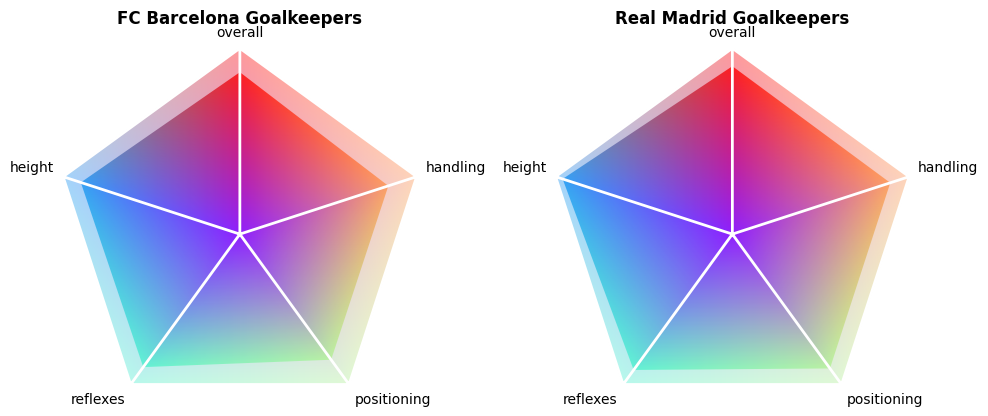

In [29]:
goalkeepers = df_team[df_team['position'] == 'Goalkeeper']

max_height = df['height_cm'].max()

proportions = np.array([goalkeepers['overall'].mean(),goalkeepers['goalkeeping_handling'].mean(),
                        goalkeepers['goalkeeping_positioning'].mean(), goalkeepers['goalkeeping_reflexes'].mean(),
                          goalkeepers['height_cm'].mean()]) / 100

proportions[-1] = proportions[-1]*100/max_height      # scaling it from 0-208 to 0-100


labels = ["overall", "handling", "positioning", "reflexes", "height"]     # dyh el skills nafsaha

thresholds = np.array([85, 85, 85, 85, 182*100/max_height]) / 100

# This team lacks in attacking due to with {labels} higher than {threshold}
# This team is lacking in {labels}. The team needs to improve from {proportions} to {thresholds} at least
for i in range(len(labels)):
    if proportions[i] < thresholds[i]:
        print(f"*{team_name}* is lacking in {labels[i]}. It needs to improve from {round(proportions[i]*100, 2)} to {round(thresholds[i]*100, 2)} at least")
        # round the decimals to 2nd decimal

goalkeepers2 = df_team2[df_team2['position'] == 'Goalkeeper']

proportions2 = np.array([goalkeepers2['overall'].mean(),goalkeepers2['goalkeeping_handling'].mean(),
                        goalkeepers2['goalkeeping_positioning'].mean(), goalkeepers2['goalkeeping_reflexes'].mean(),
                            goalkeepers2['height_cm'].mean()]) / 100

proportions2[-1] = proportions2[-1]*100/max_height      # scaling it from 0-208 to 0-100



N = len(proportions)
proportions = np.append(proportions, 1)
proportions2 = np.append(proportions2, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
triang_foregr2 = tri.Triangulation(x * proportions2, y * proportions2, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.figure(figsize=(10, 5))  # Create a new figure

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name + ' Goalkeepers', weight = 'bold')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr2, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(team_name2 + ' Goalkeepers', weight = 'bold')

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

In [30]:
# print non object columns sorted alphabetically
print(sorted(df.select_dtypes(exclude=['object']).columns))
print("passing" in df.columns)

['age', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'body_type_Lean', 'body_type_Normal', 'body_type_Stocky', 'body_type_Unique', 'cam', 'cb', 'cdm', 'cf', 'club_contract_valid_until_year', 'club_jersey_number', 'club_team_id', 'cm', 'defending', 'defending_marking_awareness', 'defending_sliding_tackle', 'defending_standing_tackle', 'dribbling', 'fifa_version', 'gk', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'height_cm', 'international_reputation', 'lam', 'lb', 'lcb', 'lcm', 'ldm', 'league_id', 'league_level', 'lf', 'lm', 'ls', 'lw', 'lwb', 'mentality_aggression', 'mentality_composure', 'mentality_interceptions', 'mentality_penalties', 'mentality_positioning', 'mentality_vision', 'movement_acceleration', 'movement_agility', 'movement_balance', 'movement_reactions', 'movement_sprint_speed', 'nationality_id', 'overall', 'pace', 'pass